# Results

In [1]:
from retina_quantification import *
from sklearn import metrics
dirname = os.getcwd()

In [57]:
import pickle
file = open("RF_Model_solution1_up.pkl", 'rb')
data = pickle.load(file)
[save_rf_clf,df_learning,X_train,y_train,X_test,y_test,upper_limit,lower_limit,std_RPEDC]=data

In [3]:
X_test

,Convexity,TR_A,RPEDC_A,NSR_A,thick_score,thin_score
356,0.000290,586.146837,124.096911,462.049925,0.000000,200.000000
10,0.000100,507.828024,152.340426,355.487597,200.000000,0.000000
65,0.000169,731.831524,140.997958,590.833567,46.671762,0.000000
68,0.000216,660.294645,139.380377,520.914269,0.000000,0.000000
26,0.000114,448.107923,141.333570,306.774353,76.653342,0.541913
...,...,...,...,...,...,...
239,0.000203,594.367546,129.549906,464.817639,68.692369,200.000000
256,0.000155,530.150531,116.424906,413.725625,0.000000,200.000000
272,0.000194,635.388371,148.250079,487.138292,200.000000,0.000000
193,0.000168,288.876500,118.944249,169.932251,0.000000,200.000000


In [4]:
ascan_step=2/879 #mm
lateral_step=6.7/1000

# ascan_step=2/512 #mm
# lateral_step=6.7/1000 #mm

## On intial dataset

In [58]:
y_pred=save_rf_clf.predict(X_test)
print("Test accuracy:",metrics.accuracy_score(y_test, y_pred))

Test accuracy: 0.9047619047619048


In [59]:
positives=(y_test==1)
print("Test accuracy:",metrics.accuracy_score(y_test[positives], y_pred[positives]))
negative=(y_test==0)
print("Test accuracy:",metrics.accuracy_score(y_test[negative], y_pred[negative]))

Test accuracy: 0.975609756097561
Test accuracy: 0.7727272727272727


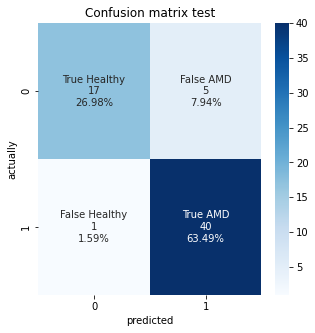

Accuracy test: 90.5%


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cf_matrix=confusion_matrix(y_test, y_pred)

group_names = ['True Healthy','False AMD','False Healthy','True AMD']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion matrix test")
plt.xlabel("predicted")
plt.ylabel("actually")
plt.show()
print("Accuracy test: {:.1f}%".format(accuracy_score(y_test, y_pred)*100))

In [61]:
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity (TPR=TP/P): ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity (TNR=TN/N): ', specificity1)

Sensitivity (TPR=TP/P):  0.7727272727272727
Specificity (TNR=TN/N):  0.975609756097561


Train accuracy: 0.782258064516129
Test accuracy: 0.7936507936507936


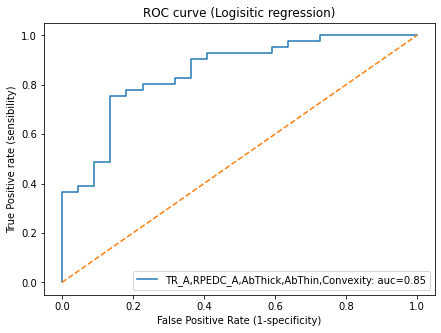

In [26]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
print("Train accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))
y_pred=clf.predict(X_test)
print("Test accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label="TR_A,RPEDC_A,AbThick,AbThin,Convexity: auc={:.2f}".format(auc))
plt.plot(fpr,fpr,"--")
plt.legend(loc=4)
plt.title("ROC curve (Logisitic regression)")
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive rate (sensibility)")
plt.show()

## On OCTID

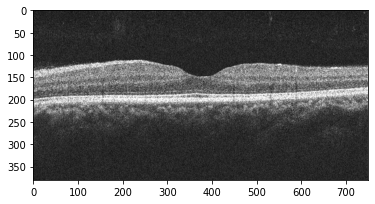

In [28]:
n=1
crop=120
extension=".jpeg"
filepathname=os.path.join(dirname,'..', 'data','OCTID','normal','NORMAL'+str(n)+extension)
retina_normal = mpimg.imread(filepathname)
retina_normal = cv2.cvtColor(retina_normal, cv2.COLOR_BGR2GRAY)
retina_normal=retina_normal[:-crop,:]
plt.imshow(retina_normal,cmap='gray')

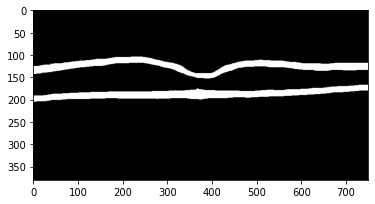

In [29]:
i_closing=mask(retina_normal,sigma=5,area_threshold=2000)
plt.imshow(i_closing,cmap='gray')

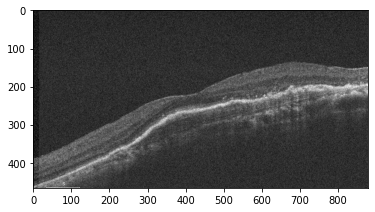

In [30]:
n=20
crop=120
extension=".jpeg"
filepathname=os.path.join(dirname,'..', 'data','OCTID','amd','AMRD'+str(n)+extension)
retina_normal = mpimg.imread(filepathname)
retina_normal = cv2.cvtColor(retina_normal, cv2.COLOR_BGR2GRAY)
retina_normal=retina_normal[:-crop,:]
plt.imshow(retina_normal,cmap='gray')

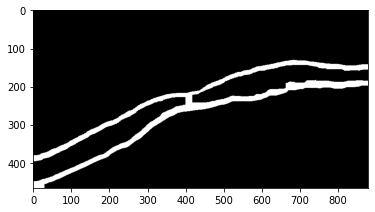

In [42]:
i_closing=mask(retina_normal,sigma=5,area_threshold=2000)
plt.imshow(i_closing,cmap='gray')

In [32]:
new_size=2
new_px=879
old_size=6.7
old_px=1000



In [33]:
len(lower_limit)

500

In [34]:
from scipy.interpolate import interp1d
def resize(list_values,old_px,new_px,old_size,new_size):
    x_new=np.linspace(0,new_size/2,new_px//2)
    x_old=np.linspace(0,old_size/2,old_px//2)
    f = interp1d(x_old, list_values)
    y_new=f(x_new)
    return(y_new)

upper_limit=resize(upper_limit,old_px,new_px,old_size,new_size)*ascan_step/(2/512)
lower_limit=resize(lower_limit,old_px,new_px,old_size,new_size)*ascan_step/(2/512)  
std_RPEDC=resize(std_RPEDC,old_px,new_px,old_size,new_size)*ascan_step/(2/512)  

In [35]:
dirname_OCTID = os.path.join(dirname,'..','data','OCTID')
path_normal = os.path.join(dirname_OCTID,'normal')
path_amd = os.path.join(dirname_OCTID,'amd')


In [36]:
try:
	df_QT_OCTID_normal = pd.read_pickle("../dataset/solution1_quantifiers_OCTID_normal.pkl")
	df_QT_OCTID_amd = pd.read_pickle("../dataset/solution1_quantifiers_OCTID_amd.pkl")
except:
	[df_QT_OCTID_normal,TR_normal,RPEDC_normal,NSR_normal]=compute_folder(path_normal,"control",ascan_step,lateral_step,upper_limit,lower_limit,std_RPEDC,crop)
	[df_QT_OCTID_amd,TR_amd,RPEDC_amd,NSR_amd]=compute_folder(path_amd,"AMD",ascan_step,lateral_step,upper_limit,lower_limit,std_RPEDC,crop)
	df_QT_OCTID_normal.to_pickle("../dataset/solution1_quantifiers_OCTID_normal.pkl")
	df_QT_OCTID_amd.to_pickle("../dataset/solution1_quantifiers_OCTID_amd.pkl")

In [37]:
df_QT_OCTID_normal.head()
df_QT_OCTID_normal["thin_score"]=0

In [38]:
df_QT_OCTID_amd.head()

,TR,RPEDC,NSR,Convexity,Type,Origin,TR_A,RPEDC_A,NSR_A,thick_score,thin_score
0,"[0.12855080559148477, 0.12866025682304907, 0.1...","[0.039951331265873906, 0.04002284054346064, 0....","[0.08859947432561087, 0.08863741627958845, 0.0...",0.001186,AMD,AMRD1.jpeg,0.373568,0.075828,0.297740,0.0,0
1,"[0.1856107878540292, 0.18538228917685956, 0.18...","[0.03954048121128331, 0.03946361825638951, 0.0...","[0.1460703066427459, 0.14591867092047006, 0.14...",0.000310,AMD,AMRD10.jpeg,0.350084,0.082332,0.267752,0.0,0
2,"[0.180066157542833, 0.17995488031102605, 0.179...","[0.04109976886527765, 0.04105529216149557, 0.0...","[0.13896638867755537, 0.1388995881495305, 0.13...",0.000167,AMD,AMRD11.jpeg,0.375163,0.082747,0.292416,0.0,0
3,"[0.18210273057939472, 0.18231949623372884, 0.1...","[0.039096996258739226, 0.03887197086713746, 0....","[0.1430057343206555, 0.1434475253665914, 0.143...",0.000330,AMD,AMRD12.jpeg,0.456042,0.086263,0.369780,0.0,0
4,"[0.03544926939107869, 0.035057005687893876, 0....","[0.033173956535560864, 0.03278169283237605, 0....","[0.0022753128555178274, 0.0022753128555178274,...",0.000572,AMD,AMRD13.jpeg,0.370808,0.081794,0.289014,0.0,0


In [39]:
df_QT_OCTID_normal_filter=df_QT_OCTID_normal.drop(['TR','RPEDC','NSR'],axis=1)
X=df_QT_OCTID_normal_filter.drop(["Type","Origin"],axis=1)
y_test=(df_QT_OCTID_normal_filter["Type"]=="AMD")
y_pred=save_rf_clf.predict(X)
print("Test accuracy:",metrics.accuracy_score(y_test, y_pred))

Test accuracy: 1.0


In [40]:
df_QT_OCTID_amd_filter=df_QT_OCTID_amd.drop(['TR','RPEDC','NSR'],axis=1)
X=df_QT_OCTID_amd_filter.drop(["Type","Origin"],axis=1)
y_test=(df_QT_OCTID_amd_filter["Type"]=="AMD")
y_pred=save_rf_clf.predict(X)
print("Test accuracy:",metrics.accuracy_score(y_test, y_pred))

Test accuracy: 0.9272727272727272


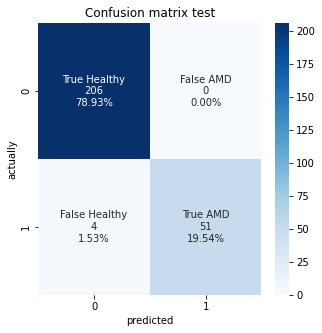

Accuracy test: 98.5%


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_QT_OCTID= result = pd.concat([df_QT_OCTID_normal_filter,df_QT_OCTID_amd_filter])
X=df_QT_OCTID.drop(["Type","Origin"],axis=1)
y_test=(df_QT_OCTID["Type"]=="AMD")
y_pred=save_rf_clf.predict(X)

cf_matrix=confusion_matrix(y_test, y_pred)

group_names = ['True Healthy','False AMD','False Healthy','True AMD']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion matrix test")
plt.xlabel("predicted")
plt.ylabel("actually")
plt.show()
print("Accuracy test: {:.1f}%".format(accuracy_score(y_test, y_pred)*100))

In [50]:
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity (TPR=TP/P): ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity (TNR=TN/N): ', specificity1)

Sensitivity (TPR=TP/P):  1.0
Specificity (TNR=TN/N):  0.9272727272727272


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


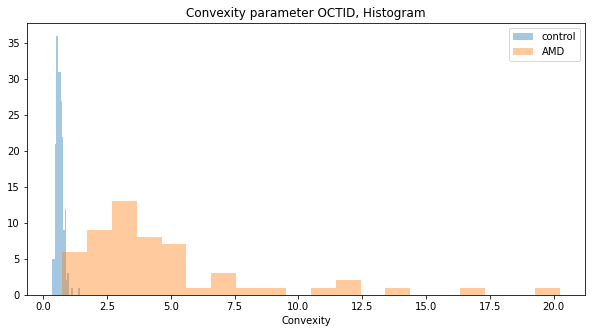

In [55]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df_QT_OCTID_normal[df_QT_OCTID_normal["Type"]=="control"]["Convexity"]*10000,  kde=False, label='control',bins=20).set_title("Convexity parameter OCTID, Histogram")
sns.distplot(df_QT_OCTID_amd[df_QT_OCTID_amd["Type"]=="AMD"]["Convexity"]*10000,  kde=False,label='AMD',bins=20)
plt.legend()
# sns.set_title("Convexity parameter, histogram")